# Cluster

# Introduction

The dataset we use this time is "WC cleaneddata.csv".We want to find out during the WORLD CUP which kind of tweet is more official and canbe trusted.

Before we use clustering, we need drop all categorical columns.Then we need to do the regularization which would lead to a better results.


# Theory

There are Three  main clustering methods: KMEAN,DBSAN and Hierarchical Clustering. 

Kmeans clusters the instances by continuously searching K centers. I will use both elbow method and silhouette method to decide how much groups it should be.

DBSAN groups the data points which the extent of similarity is below a certain level. I will use nearestneighbors to decide the extent of similarity I should choose.

Hierarchical Clustering sequentially combine the most similar instances/groups. Every single combination combines the most similar data point and set them as a level. The final group set can be any number I want. In this case, I will set 2 since this is the number the original data set says.

# Method

# Data Selection

Import the package, then read the data and drop the Categrical columns.

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
#read data
df=pd.read_csv("../data/01-modified-data/WC cleaneddata.csv")
df=df.drop(['text','created_at','keyword','label'],axis=1)
#Standarization
col=df.columns
df= pd.DataFrame(StandardScaler().fit_transform(df),columns=col)
#drop outliers
df=df[df['Likes']<5]
df


,author_id,Tweet Point,Follows,Likes,unofficial,retweet_count
0,0.904853,-1.107222,-0.058567,-0.113111,-1.260457,-0.259917
1,-1.288208,-1.423023,3.497612,0.076488,-1.260457,-0.137983
2,-1.288208,-0.506083,-0.062956,-0.147293,-1.260457,-0.199888
3,-1.288208,-0.506083,-0.063626,-0.036878,-1.260457,-0.259917
4,1.028934,1.215083,-0.061449,-0.058190,-1.260457,0.070244
...,...,...,...,...,...,...
7083,1.074466,0.853993,-0.064372,-0.158687,0.793363,-0.254289
7084,1.074466,0.853993,-0.056467,-0.080732,0.793363,-0.259917
7085,0.805431,1.432386,-0.064913,-0.092700,0.793363,0.212813
7086,1.074466,0.853993,-0.060678,-0.034992,0.793363,-0.259917


# Hyperparameter Tuning

Hyperparameter tuning is based on the elbow method and the Silhouette methods. Normally, We will pick the K where the  turning point is.

Text(0, 0.5, 'Within cluster sum of squares(WCSS)')

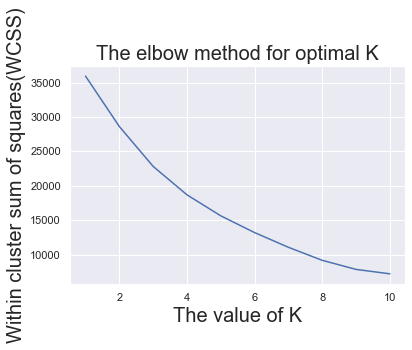

In [26]:
warnings.filterwarnings('ignore')
WCSS=[]
for i in range(1,11):
    kmeanModel=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeanModel.fit(df)
    WCSS.append(kmeanModel.inertia_)
sns.set_theme()
plt.plot(range(1,11),WCSS)
plt.title('The elbow method for optimal K',fontsize=20)
plt.xlabel('The value of K',fontsize=20)
plt.ylabel('Within cluster sum of squares(WCSS)',fontsize=20)

OPTIMAL PARAMETER = 12


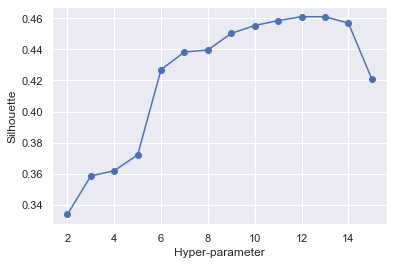

In [29]:
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels
opt_labels=maximize_silhouette(df,algo='kmeans',nmax=15,i_plot=True)

The best number of group is 12. So I will choose 12 as the hyperparameter.

OPTIMAL PARAMETER = 6.0


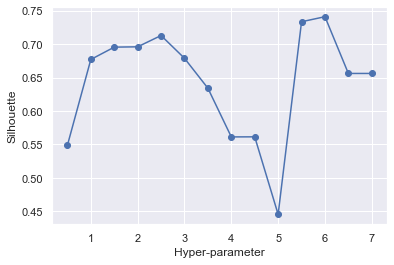

In [48]:
opt_labels=maximize_silhouette(df,algo="dbscan",nmax=15, i_plot=True)

OPTIMAL PARAMETER = 3


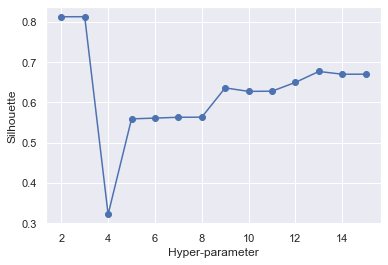

In [49]:
opt_labels=maximize_silhouette(df,algo="birch",nmax=15, i_plot=True)

# Final Results

KMEAN

In [ ]:
kmeanModel=KMeans(n_clusters=12,init='k-means++',random_state=42)
kmeanModel.fit(df)
kmean_label=kmeanModel.labels_

DBSAN

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=2.5,min_samples=2).fit(df)
labels_DB=model.labels_

HIerarchy Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
#Call the model
clustering_model=AgglomerativeClustering(n_clusters=12,affinity="euclidean",linkage='ward')
clustering_model.fit(df)
#Predicting clusters
Hierarchy_label=clustering_model.labels_

# Results

KMEANS

Text(0.5, 1.0, 'Kmean')

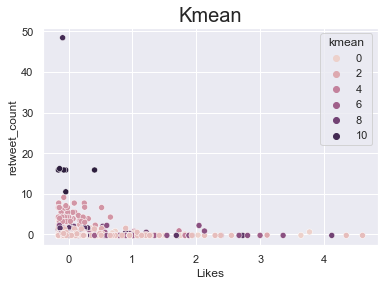

In [ ]:
df['kmean']=kmean_label
a=sns.scatterplot(x='Likes',y='retweet_count',hue='kmean',data=df)
a.set_title('Kmean',fontsize=20)

DBSAN

Text(0.5, 1.0, 'DBSAN')

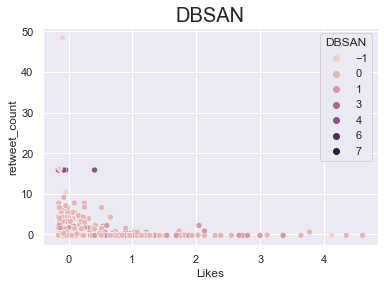

In [ ]:
df['DBSAN']=labels_DB
a=sns.scatterplot(x='Likes',y='retweet_count',hue='DBSAN',data=df)
a.set_title('DBSAN',fontsize=20)

Hierarchy_clustering

Text(0.5, 1.0, 'Hierarchy Clustering')

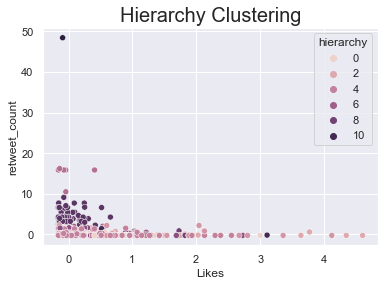

In [ ]:
df['hierarchy']=Hierarchy_label
a=sns.scatterplot(x='Likes',y='retweet_count',hue='hierarchy',data=df)
a.set_title('Hierarchy Clustering',fontsize=20)

As these three plots shown, KMEAN,DBSAN,Hierarchy clustering almost hav the similar results. It can seperate those tweet account which are not so active.
However, I can't get what I want form the clustering method.

# Conclusion

We use three main clusteding method model to conduct the unsuperivised learning.
However, clustering cannot satisfy our needs since the result is not what we need.
Through this we can't finish our target.